<a href="https://colab.research.google.com/github/yugantgholase/Data-Analytics/blob/main/TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author : Yugant Gholase** 

Task 1 : Prediction using Supervised Machine Learning

Grip @ Sparks Foundation (September Batch)

In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables.  



In [ ]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


**Step 1 - Reading the data from source**

In [ ]:
# Reading data from given remote link

url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print('Data import successful')

data

Data import successful


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
# finding total noumber of elements in  dataframe
data.size 

50

In [ ]:
#representing the dimensionality of the DataFrame
data.shape

(25, 2)

In [ ]:
#Detect missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
#Print a concise summary of a DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# Generate descriptive statistics
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df = data.head(10)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Step 2 - Input data Visualization**

<function matplotlib.pyplot.show>

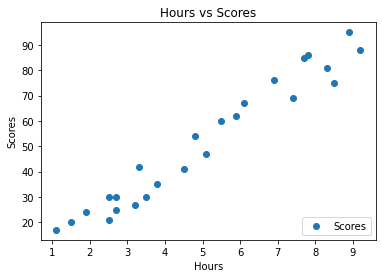

In [ ]:
# Plotting the distribution of scores as a scatter plot

plt.scatter(data['Hours'], data['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend(['Scores'], loc = 'lower right')

plt.title('Hours vs Scores')
plt.show


**Step 3 - Data Preprocessing**

In [ ]:
# Selecting the data to be trained
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
X, y


(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))


**Step 4 - Model Training**

In [ ]:
# Splitting the data into training and testing sets, and training the algorithm.
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


In [ ]:
regression = LinearRegression()
regression.fit(X_train.reshape(-1,1),y_train)

print("Training complete. ")

Training complete. 


**Step 5 - Plotting the Line of regression**

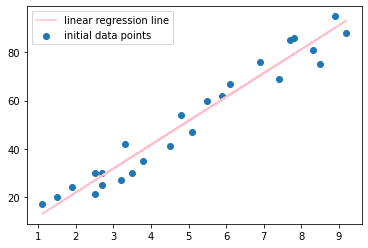

In [ ]:
# Plotting the line of regression
line = regression.coef_*X + regression.intercept_

plt.scatter(X,y)
plt.plot(X,line, color= 'pink')
plt.legend(['linear regression line', 'initial data points'])
plt.show()


**Step 6 - Making Predictions**

In [ ]:
# Testing data
print(X_test)
# Model Prediction
y_pred = regression.predict(X_test)
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
y_test

array([20, 27, 69, 30, 62])

**Step 7 - Comparing Actual result to the Predicted Model result**

In [ ]:
# Creating a dataframe to complare Actual result to the Predicted Model result
df = pd.DataFrame({'ID':[0,1,2,3,4],'Predicted values': y_pred, 'Actual values': y_test })
df

,ID,Predicted values,Actual values
0,0,16.884145,20
1,1,33.732261,27
2,2,75.357018,69
3,3,26.794801,30
4,4,60.491033,62


In [ ]:
#Estimating training and test score
print('Training score: ', regression.score(X_train,y_train))
print('testing score: ', regression.score(X_test,y_test))

Training score:  0.9515510725211553
testing score:  0.9454906892105354


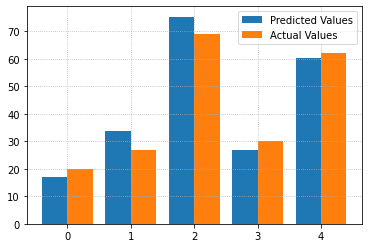

In [ ]:
# Plotting the Bar graph to depict the difference between the actual and predicted value
plt.bar(df['ID'] - 0.2 , df['Predicted values'], width = 0.4)
plt.bar( df['ID'] + 0.2,df['Actual values'], width = 0.4)
plt.legend(['Predicted Values','Actual Values'])
plt.grid(linestyle = 'dotted')
plt.show()

In [ ]:
# Testing the model with the given data

hours =9.25
test = np.array([hours])
test = test.reshape(1,-1)
test



array([[9.25]])

In [ ]:
# Predicting the score for the given number of hours
pred = regression.predict(test)
pred

array([93.69173249])

In [ ]:
print("No of hours = ", hours)
print('Predicted Score = ', pred[0])

No of hours =  9.25
Predicted Score =  93.69173248737539



**Step 8 - Evaluating the model**

In [ ]:

from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354


**Conclusion**

I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters.

**Thank You**